# Canadian Cheese & Weather Analysis

**Program Overview**:
This Jupyter notebook is designed to load and process two CSV files—one containing the Canadian Cheese directory and another containing provincial weather statistics—then merge them to explore any relationships between climate and cheese production.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Load cheese and weather datasets
cheese = pd.read_csv("cheese_data.csv")
weather = pd.read_csv("canada_weather.csv")

# Display first few rows
print("Cheese Data (first 5 rows):")
cheese.head()

print("\nWeather Data (first 5 rows):")
weather.head()

Cheese Data (first 5 rows):

Weather Data (first 5 rows):


,Community,Weather station,Location,Elevation,January(Avg. high °C (°F)),January(Avg. low °C (°F)),July(Avg. high °C (°F)),July(Avg. low °C (°F)),Annual(Avg. high °C (°F)),Annual(Avg. low °C (°F))
0,"Alberton, PE",NaN,46°51′00″N 064°01′00″W / 46.85000°N 64.01667°W...,3m (9.8ft),−3.9 (25.0),−12.5 (9.5),23.2 (73.8),14.1 (57.4),9.6 (49.3),1.3 (34.3)
1,"Baker Lake, NU",YBK,64°17′56″N 096°04′40″W / 64.29889°N 96.07778°W...,18.6m (61ft),−27.7 (−17.9),−34.8 (−30.6),17.0 (62.6),6.1 (43.0),−7.3 (18.9),−15.2 (4.6)
2,"Baie-Comeau, QC",YBC,49°08′00″N 068°12′00″W / 49.13333°N 68.20000°W...,22m (72ft),−8.7 (16.3),−19.9 (−3.8),20.9 (69.6),10.3 (50.5),6.6 (43.9),−3.3 (26.1)
3,"Calgary, AB",YYC,51°06′50″N 114°01′13″W / 51.11389°N 114.02028°...,"1,084m (3,556ft)",−0.9 (30.4),−13.2 (8.2),23.2 (73.8),9.8 (49.6),10.8 (51.4),−1.9 (28.6)
4,"Charlottetown, PE",YYG,46°17′19″N 063°07′43″W / 46.28861°N 63.12861°W...,49m (161ft),−3.4 (25.9),−12.1 (10.2),23.3 (73.9),14.1 (57.4),9.9 (49.8),1.3 (34.3)


In [4]:
# Extract province code from 'Community' in weather data
weather['ProvCode'] = weather['Community'].str[-2:]

# Helper function to extract Celsius from strings like '−4.8 (23.4)'
def extract_celsius(val):
    try:
        c_str = val.split(' ')[0].replace('−', '-')
        return float(c_str)
    except:
        return np.nan

# Apply function to annual high/low columns
weather['AnnualAvgHigh_C'] = weather['Annual(Avg. high °C (°F))'].apply(extract_celsius)
weather['AnnualAvgLow_C'] = weather['Annual(Avg. low °C (°F))'].apply(extract_celsius)

# Compute average annual temperature per station
weather['AnnualAvgTemp_C'] = weather[['AnnualAvgHigh_C', 'AnnualAvgLow_C']].mean(axis=1)
weather[['Community', 'ProvCode', 'AnnualAvgHigh_C', 'AnnualAvgLow_C', 'AnnualAvgTemp_C']].head()

,Community,ProvCode,AnnualAvgHigh_C,AnnualAvgLow_C,AnnualAvgTemp_C
0,"Alberton, PE",PE,9.6,1.3,5.45
1,"Baker Lake, NU",NU,-7.3,-15.2,-11.25
2,"Baie-Comeau, QC",QC,6.6,-3.3,1.65
3,"Calgary, AB",AB,10.8,-1.9,4.45
4,"Charlottetown, PE",PE,9.9,1.3,5.60


In [5]:
# Aggregate average temperature to province level
prov_temp = weather.groupby('ProvCode')['AnnualAvgTemp_C'].mean().reset_index()

# Count cheeses per province
cheese_counts = cheese.groupby('ManufacturerProvCode').size().reset_index(name='CheeseCount')
cheese_counts.rename(columns={'ManufacturerProvCode': 'ProvCode'}, inplace=True)

# Merge totals
df = pd.merge(cheese_counts, prov_temp, on='ProvCode', how='inner')
print("Merged Province-Level Data:")
df

Merged Province-Level Data:


,ProvCode,CheeseCount,AnnualAvgTemp_C
0,AB,13,2.533333
1,BC,65,7.150000
2,MB,11,-2.116667
3,NB,27,4.866667
4,NL,2,2.566667
5,NS,10,6.533333
6,ON,115,6.550000
7,PE,2,5.600000
8,QC,796,4.200000
9,SK,1,1.933333


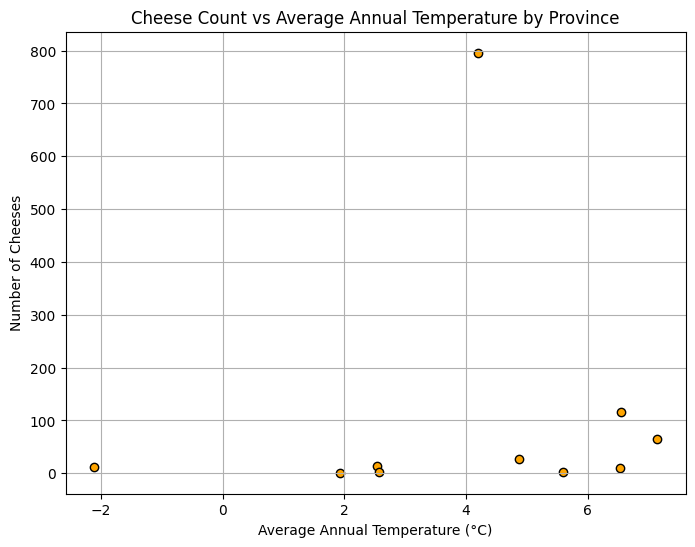

In [6]:
# Visualization 1: Scatter plot of Cheese Count vs Average Annual Temperature
plt.figure(figsize=(8, 6))
plt.scatter(df['AnnualAvgTemp_C'], df['CheeseCount'], color='orange', edgecolor='black')
plt.title('Cheese Count vs Average Annual Temperature by Province')
plt.xlabel('Average Annual Temperature (°C)')
plt.ylabel('Number of Cheeses')
plt.grid(True)
plt.show()

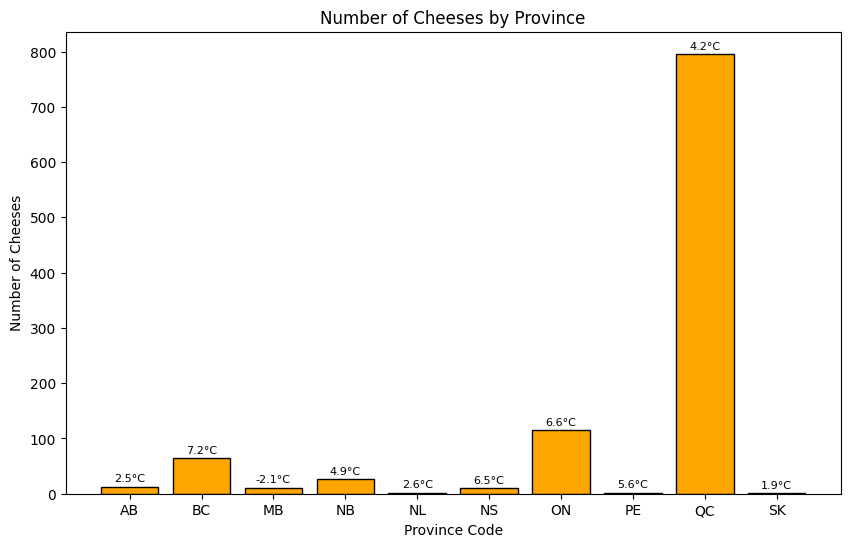

In [7]:
# Visualization 2: Bar chart of Cheese Count per Province with Temperature annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(df['ProvCode'], df['CheeseCount'], color='orange', edgecolor='black')
plt.title('Number of Cheeses by Province')
plt.xlabel('Province Code')
plt.ylabel('Number of Cheeses')

# Annotate each bar with average temperature
for bar, temp in zip(bars, df['AnnualAvgTemp_C']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,
        f"{temp:.1f}°C",
        ha='center', va='bottom', fontsize=8
    )
plt.show()

## Discussion & Inferences

1. **Cleaning & Data Pipeline**  
- We started by loading two CSV files: one for cheese data (`cheese_data.csv`) and one for weather data (`canada_weather.csv`).  
- In the weather dataset, we extracted province codes by taking the last two characters of the `Community` field.  
- We parsed strings like `“−4.8 (23.4)”` to take out the Celsius component.  
- We computed an average annual temperature per station (mean of high and low) and then averaged across stations to get a single number per province.  
- From the cheese dataset, we simply grouped by the `ManufacturerProvCode` to count how many cheeses each province has in the directory.  
- Finally, we merged province-wide temperature and cheese counts to form a combined DataFrame for analysis.

2. **Relationship Between Weather and Cheese Production**  
- In general, provinces with **milder average temperatures** (e.g., British Columbia ~7.2 °C, Ontario ~6.6 °C, Nova Scotia ~6.5 °C) have **more cheeses** listed.  
- Quebec is an outlier: despite an average annual temperature of ~4.2 °C, it has **by far the most cheeses** (796), likely due to a well-established cheese culture and large population.  
- Colder provinces—Manitoba (~−2.1 °C) and Saskatchewan (~1.9 °C)—have far fewer cheese entries, suggesting that harsher climates (and smaller dairy industries) correspond to fewer producers.  
- While temperature correlates somewhat with cheese count, **population size** and **local industry history** (especially in Québec) are major drivers.

3. **Limitations & Next Steps**  
- The weather data is station-based; provinces with more stations yield a more reliable average.  
- The cheese directory may not capture very small or informal producers in remote areas.  
- Québec’s dominant count highlights that **cultural factors** (French‐Canadian cheese tradition) and **economics** (number of dairy farms) strongly influence cheese variety beyond climate alone.  
- Further analysis could incorporate **provincial population**, **dairy farm counts**, or **GDP** to deepen understanding.

**Conclusion**: We built a simple data pipeline, cleaned and merged two datasets, created visualizations, and saw that while temperature has some relationship to cheese production, cultural and economic factors (particularly in Québec) dominate.